# 🔥 1D Heat Equation Solver (Explicit Euler Scheme)

This notebook demonstrates a finite difference solver for the 1D heat equation:
$$\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2}$$

We use the explicit Euler scheme with Dirichlet boundary conditions, and visualize the diffusion over time.

In [1]:
import os,sys
import numpy as np
import scipy as sp
import pandas as pd
import tensorflow as tf 
import matplotlib as mlt
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation
sys.path.append("../src")  # adjust path as needed
from heat_solver_FD import heat_solver_1d

###  Instantiate and Run Solver

In [4]:
output_dir = '/Users/pushpita/Documents/ML Projects/Project3/data/csv_files/'
npz_file = 0

solver = heat_solver_1d(
    x1min=0.0,
    x1max=1.0,
    nx=100,
    tmax=1.0,
    cfl=0.5,
    diff_cons=0.08,
    output_dir=output_dir,
    npz_file=npz_file,
    t_save_int=0.01,
)

x, u_store, dt = solver.evolution_euler()
t0 = u_store[0, 0]
tmax = u_store[len(u_store[:,0])-1, 0]

Plot $t = 0$ and $t = t_{max}$

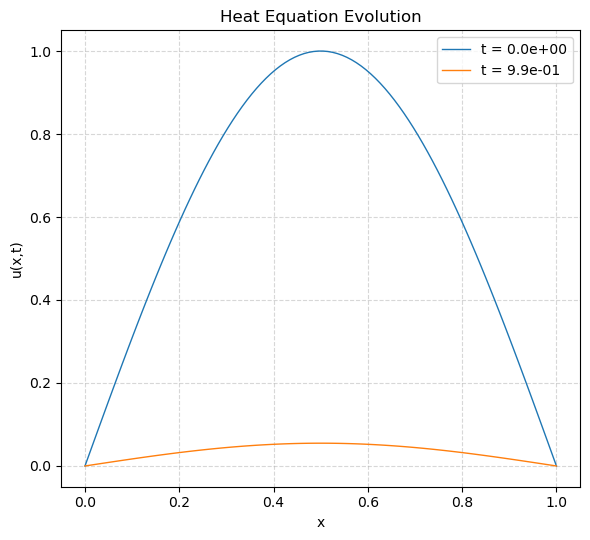

In [3]:
fig,ax = plt.subplots(1,1,figsize=(6,5.5))
ax.plot(x, u_store[0, 1:], linestyle='-', linewidth= 1, label='t = %.1e' % t0)
ax.plot(x, u_store[len(u_store[:,0])-2, 1:], linestyle='-', linewidth= 1, label='t = %.1e' % tmax)
ax.legend()
ax.grid(linestyle='--',alpha = 0.5)
ax.set_xlabel("x")
ax.set_ylabel("u(x,t)")
ax.set_title("Heat Equation Evolution")
plt.tight_layout()

### Making a movie

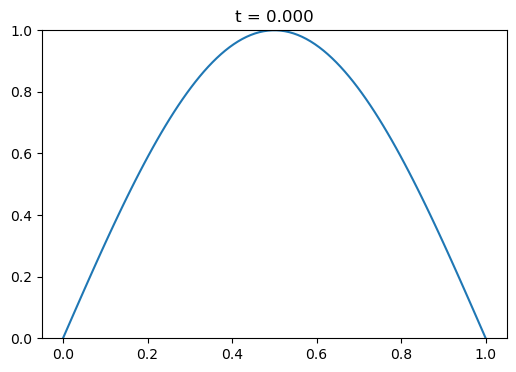

In [6]:

# Create output directory if it doesn't exist
output_dir = "../plot/animations"
os.makedirs(output_dir, exist_ok=True)

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 4))
line, = ax.plot(x, u_store[0, 1:])
ax.set_ylim(0, 1)
ax.set_title("Heat Equation Evolution")

# Animation function
def animate(i):
    line.set_ydata(u_store[i, 1:])
    ax.set_title(f"t = {u_store[i, 0]:.3f}")
    return line,

# Build animation
ani = animation.FuncAnimation(
    fig, animate, frames=range(0, len(u_store), 50), interval=50
)

# Save to MP4
ani.save(os.path.join(output_dir, "heat_equation.mp4"), writer="ffmpeg", fps=20)

### ✅ Summary

- The explicit Euler scheme was used to solve the 1D heat equation.
- CFL condition was enforced for stability.
- Time evolution was visualized and saved for downstream ML modeling or analysis.